In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
houses = pd.read_excel("/Users/lucas/Downloads/CSUSHPINSA.xlsx", sheet_name=1)

In [26]:
houses["observation_date"].dt.day.unique()

array([1], dtype=int32)

In [4]:
houses.head()

,observation_date,CSUSHPINSA,YoY House Prices
0,1987-01-01,63.733,NaN
1,1987-02-01,64.132,NaN
2,1987-03-01,64.468,NaN
3,1987-04-01,64.972,NaN
4,1987-05-01,65.546,NaN


<Axes: xlabel='observation_date', ylabel='YoY House Prices'>

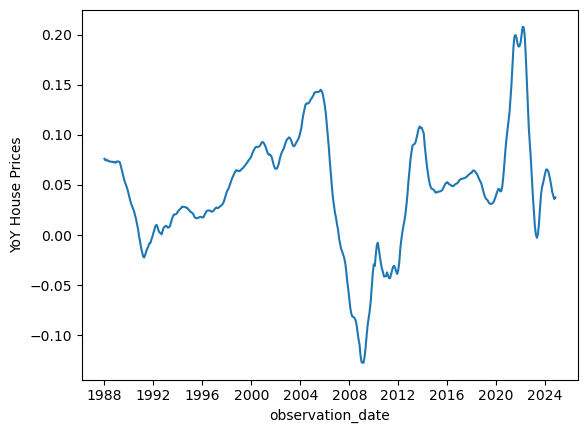

In [6]:
sns.lineplot(data = houses, x = "observation_date", y = "YoY House Prices")

In [8]:
assets = pd.read_excel("/Users/lucas/Downloads/CSUSHPINSA.xlsx", sheet_name=2)
assets.head()

,observation_date,RESPPANWW
0,2002-12-18,720761
1,2002-12-25,733136
2,2003-01-01,732202
3,2003-01-08,724902
4,2003-01-15,721325


In [22]:
assets["Year-Month"] = assets["observation_date"].dt.strftime("%Y-%m")
assets_monthly = assets.groupby("Year-Month")["RESPPANWW"].first().reset_index()
assets_monthly["observation_date"] = pd.to_datetime(assets_monthly["Year-Month"] + "-01")
assets_monthly.head()

,Year-Month,RESPPANWW,observation_date
0,2002-12,720761,2002-12-01
1,2003-01,732202,2003-01-01
2,2003-02,720885,2003-02-01
3,2003-03,723792,2003-03-01
4,2003-04,733626,2003-04-01


In [28]:
df = houses.merge(assets_monthly, how = 'left', on = 'observation_date')

In [38]:
df[["observation_date", "RESPPANWW"]].iloc[220-12]

observation_date    2004-05-01 00:00:00
RESPPANWW                      759949.0
Name: 208, dtype: object

In [39]:
df[["observation_date", "RESPPANWW"]].iloc[220]

observation_date    2005-05-01 00:00:00
RESPPANWW                      803447.0
Name: 220, dtype: object

In [44]:
df["YoY Total Assets"] = df["RESPPANWW"].pct_change(periods=12)

In [56]:
df = df.loc[df["observation_date"] >= "2003-12-01"].reset_index(drop=True)

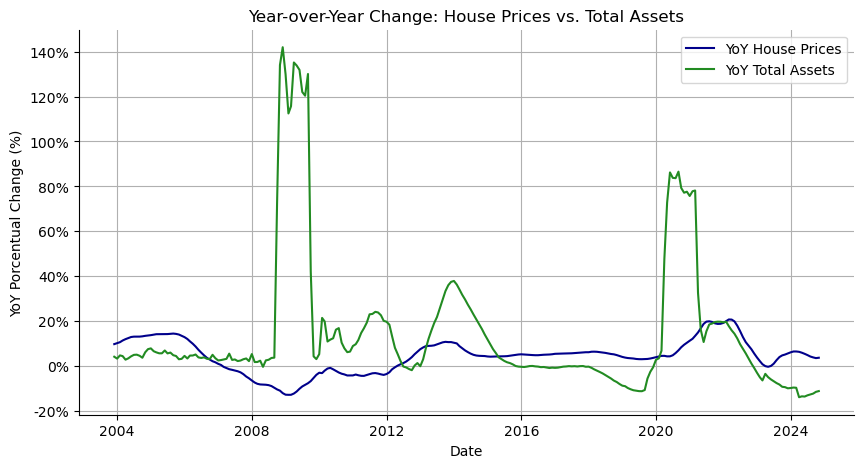

In [76]:
fig, ax = plt.subplots(figsize=(10, 5))  

sns.lineplot(data=df, x="observation_date", y="YoY House Prices", color="darkblue", label="YoY House Prices", ax = ax)
sns.lineplot(data=df, x="observation_date", y="YoY Total Assets", color="forestgreen", label="YoY Total Assets", ax = ax)
sns.despine()
plt.xlabel("Date")
plt.ylabel("YoY Porcentual Change (%)")
plt.title("Year-over-Year Change: House Prices vs. Total Assets")
plt.legend()  
plt.grid(True)  
ax.yaxis.set_major_formatter("{x:.0%}")

plt.show()